In [ ]:
Observations: Ramicane had the smallest mean tumor volume out of the drugs tested. Ketrapil on the other hand had
    the largest mean tumor voulme. There were more male mice than female mice involved.

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [50]:
mouse_metadata_path="/Users/guoyalong/Desktop/homework/Pymaceuticals-/data/Mouse_metadata.csv"
study_results_path="/Users/guoyalong/Desktop/homework/Pymaceuticals-/data/Study_results.csv"

In [51]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [52]:
merged_data=pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [53]:
merged_data["Mouse ID"].nunique()

249

In [54]:
duplicated_mice =merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [55]:
cleaned_data =merged_data[merged_data['Mouse ID'].isin(duplicated_mice)==False]
cleaned_data["Mouse ID"].nunique()

248

In [56]:
mean = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).mean()
median = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).median()
var = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).var()
std = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).std()
sem = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).sem()

summary_stat_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
regimen_count=cleaned_data["Drug Regimen"].value_counts()
regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: title={'center': 'Total Number of Rows per Drug Regimen (Pandas)'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

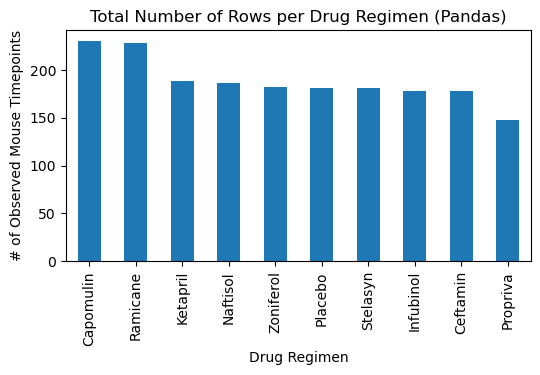

In [58]:
regimen_count.plot(kind='bar', figsize=(6, 3),ylabel="# of Observed Mouse Timepoints", title='Total Number of Rows per Drug Regimen (Pandas)')


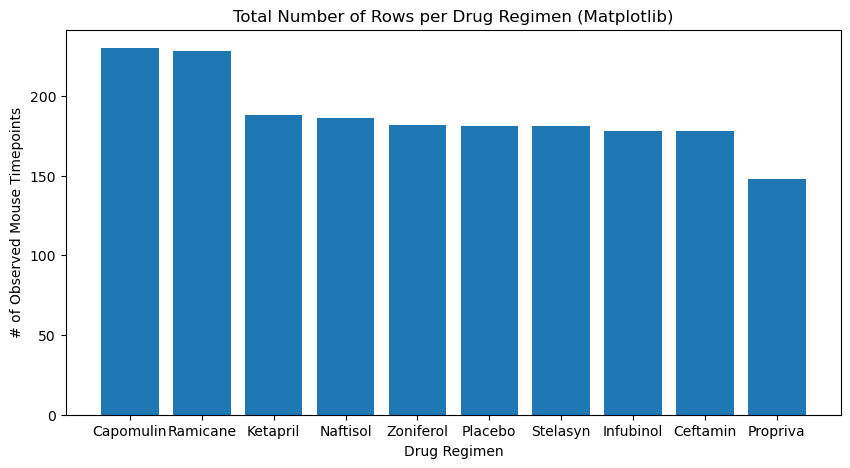

In [59]:
plt.figure(figsize=(10, 5))
plt.bar(regimen_count.index, regimen_count.values)
plt.title('Total Number of Rows per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [60]:
gender_distrib=cleaned_data['Sex'].value_counts()
gender_distrib

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: ylabel='Sex'>

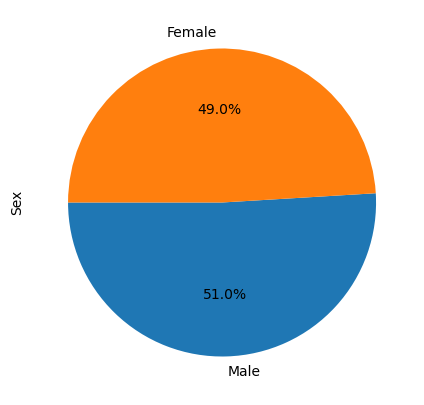

In [61]:
gender_distrib.plot(kind='pie',autopct='%1.1f%%',ylabel="Sex", startangle=180, figsize=(5, 5),)


<function matplotlib.pyplot.show(close=None, block=None)>

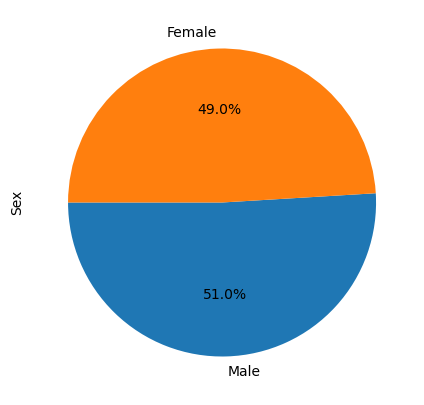

In [62]:
plt.figure(figsize=(5, 5))
plt.pie(gender_distrib,labels=gender_distrib.index,autopct='%1.1f%%', startangle=180)
plt.ylabel('Sex')
plt.show

In [63]:
final_tumor_vol = cleaned_data.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()
final_tumor_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [64]:
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_list = []
for drug in regimen:
    
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    final_tumor_vol_list.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')

Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

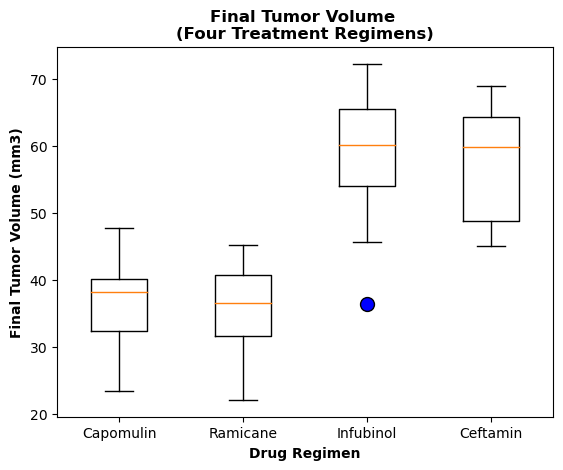

In [65]:
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'b','markersize': 10})

final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

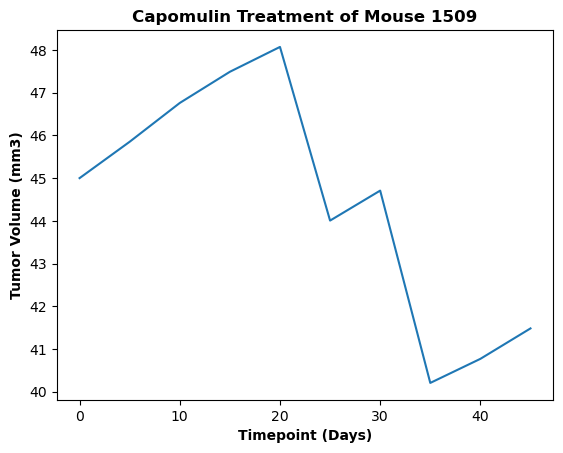

In [66]:
Capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
mouse_df = Capomulin_data.loc[Capomulin_data['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

plt.title("Capomulin Treatment of Mouse 1509", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

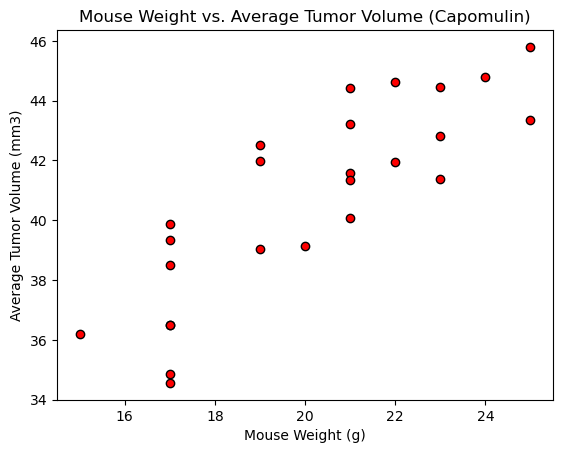

In [67]:
capomulin_d = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_d.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_d.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='red', edgecolors='black')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

plt.show()



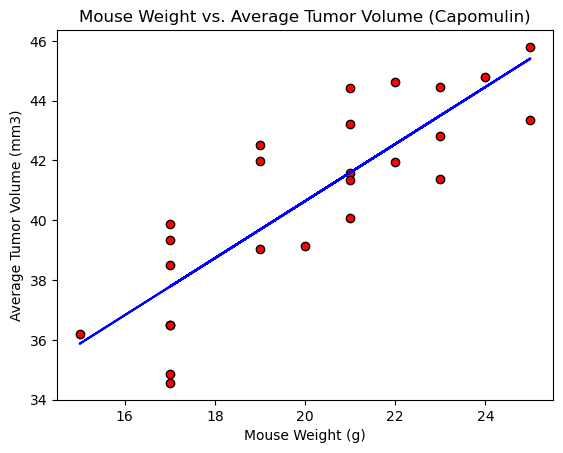

In [68]:
correlation_coefficient = np.corrcoef(mouse_weights, avg_tumor_volume)[0, 1]

slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volume)

plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='red', edgecolors='black')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='blue')

plt.show()